---
title: "PM Data"
execute:
  echo: false
  output: false
---

This notebook is a first pass on pulling and visualizing PM data stored on the [Open Storage Network](https://openstoragenetwork.readthedocs.io/en/latest/index.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def loadData(url):
    """ 
    Load in data from a given url and parse the datatime column. If needed, convert timezones and set datetime as index. 

    Args:
        string containing the url.

    Returns:
        dataframe
    """
    # server_timezone = "UTC"
    # new_timezone = "US/Central"
    df = pd.read_csv(url)
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    # df = df.set_index('dateTime')
    # df.index = df.index.tz_localize(tz='UTC').tz_convert(tz='US/Central')

    return df

In [3]:
#| echo: true
#| output: true
# read bme data from url for may 2nd
bme_url = "https://ncsa.osn.xsede.org/ees230012-bucket01/central-node-8/2023/2023/05/02/MINTS_001e06323a37_BME280_2023_05_02.csv"
bme_df = loadData(bme_url)
bme_df.head()

,dateTime,temperature,pressure,humidity,altitude
0,2023-05-02 00:00:01.768982,23.12,99579.0,31.0,146.37
1,2023-05-02 00:00:11.784763,23.14,99573.0,31.0,146.87
2,2023-05-02 00:00:21.815439,23.12,99577.0,31.0,146.54
3,2023-05-02 00:00:31.846306,23.12,99572.0,30.0,146.96
4,2023-05-02 00:00:41.861709,23.12,99570.0,30.0,147.13


In [4]:
#| echo: true
#| output: true
ips_url = "https://ncsa.osn.xsede.org/ees230012-bucket01/central-node-8/2023/2023/05/02/MINTS_001e06323a37_IPS7100_2023_05_02.csv"
ips_df = loadData(ips_url)
ips_df.head()

,dateTime,pc0_1,pc0_3,pc0_5,pc1_0,pc2_5,pc5_0,pc10_0,pm0_1,pm0_3,pm0_5,pm1_0,pm2_5,pm5_0,pm10_0
0,2023-05-02 00:00:00.153699,11512,5101,1093,93,16,0,0,0.009619,0.124717,0.238913,0.316666,0.443954,0.443954,0.443954
1,2023-05-02 00:00:01.154625,11426,4975,1096,94,22,0,0,0.009547,0.121789,0.236346,0.315338,0.490778,0.490778,0.490778
2,2023-05-02 00:00:02.155689,11382,4851,1092,95,28,0,0,0.009511,0.118964,0.233116,0.312875,0.533701,0.533701,0.533701
3,2023-05-02 00:00:03.156913,11412,4737,1086,96,33,0,0,0.009536,0.116425,0.229902,0.310250,0.573414,0.573414,0.573414
4,2023-05-02 00:00:04.157472,11597,4747,1077,96,38,0,0,0.009691,0.116800,0.229366,0.310305,0.614702,0.614702,0.614702


### Dictionaries to get nicer labels

In [5]:
pm_labels = {
    'pm0_1': 'PM$_{0.1}$',
    'pm0_3': 'PM$_{0.3}$',
    'pm0_5': 'PM$_{0.5}$',
    'pm1_0': 'PM$_{1}$',
    'pm2_5': 'PM$_{2.5}$',
    'pm5_0': 'PM$_5$',
    'pm10_0': 'PM$_{10}$'
}
pc_labels = {
    'pc0_1': 'PC$_{0.1}$',
    'pc0_3': 'PC$_{0.3}$',
    'pc0_5': 'PC$_{0.5}$',
    'pc1_0': 'PC$_{1}$',
    'pc2_5': 'PC$_{2.5}$',
    'pc5_0': 'PC$_5$',
    'pc10_0': 'PC$_{10}$'
}


In [6]:
# sns.set()
def plotPMwithAQS(df, pm_size):
    """ 
    Plot a relevant PM concentration with 24-hr AQ standards from WHO, EEA, EPA

    Args:
        pm dataframe, pm_size to plot (as a string, "pm2_5",  "pm10_0", etc.)

    Returns:
        Nothing. Plot created
    
    """

    fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
    ax.plot(df['dateTime'], df[pm_size], label=pm_labels[pm_size], color='orange')    
    # plt.plot(pm_df['dateTime'], pm_df['pm2_5'].rolling(3600).mean(), label='1H SMA')
    
    if pm_size == 'pm2_5':
        plt.axhline(y=25, ls='--', c='r', label='WHO & EEA')
        plt.axhline(y=35, ls='--', c='purple', label='EPA')
        ax.set_ylabel(f'{pm_labels[pm_size]} concentration ($\mu g/ m^3$)' )
        plt.title(f'Measured {pm_labels[pm_size]} Levels and \nRecommended 24HR Air Quality Standards')
    else:        
        ax.set_ylabel(f'{pm_labels[pm_size]} concentration ($\mu g/ m^3$)' )
        plt.title(f'Measured {pm_labels[pm_size]} Levels')

    
    plt.xticks(rotation=45)
    plt.xlabel('Time in UTC (MM:DD HH)')

    ax.margins(x=0)
    plt.ylim(0,)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

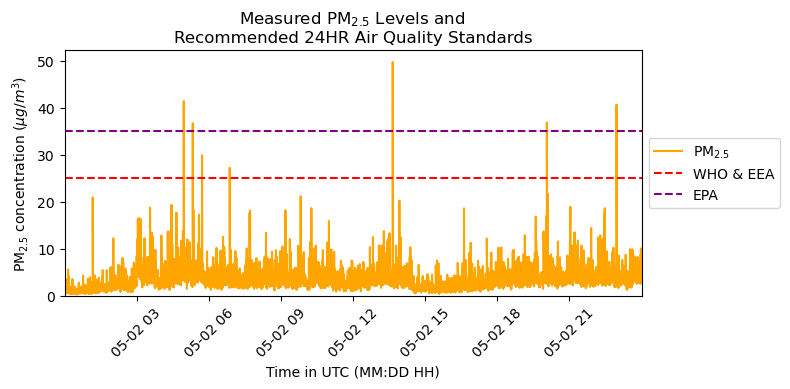

In [7]:
#| echo: true
#| output: true
plotPMwithAQS(ips_df, 'pm2_5')